In [1]:
# Install PyCaret (multiclass tutorial equivalent)
!pip install pycaret pandas


  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached ipywidgets-8.1.8-py3-none-any.whl.metadata (2.4 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pyod-2.0.5-py3-none-any.whl.metadata (46 kB)
  Using cached lightgbm-4.6.0-py3-none-macosx_10_15_x86_64.whl.metadata (17 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached importlib_metadata-8.7.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
  Using cached plotly-6.3.1-py3-none-any.whl.metadata (8.5 kB)

In [2]:
import sys
print(sys.executable)

/Users/kartikeysharma/Documents/pycaret-assignment/.venv/bin/python


In [ ]:
# Ensure the Excel engine is available in this environment
try:
    import openpyxl  # noqa
except Exception:
    # Use Jupyter-friendly magic so the package is available immediately
    %pip install -q openpyxl

import pandas as pd
from pycaret.classification import *

# Load from Excel (preferred)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

print("Shape:", df.shape)
print("Classes:", df['quality'].unique())
df.head()


Shape: (1599, 12)
Classes: [5 6 7 4 8 3]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# Cell 3 — Optional: sample a subset of the dataset for faster runs
# (Adjust the fraction depending on your system performance)
# Filter out rare classes
min_samples = 20
class_counts = df['quality'].value_counts()
valid_classes = class_counts[class_counts >= min_samples].index
df_clean = df[df['quality'].isin(valid_classes)]

print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")
print("\nClass distribution:")
print(df_clean['quality'].value_counts().sort_index())

Original shape: (1599, 12)
Cleaned shape: (1571, 12)

Class distribution:
quality
4     53
5    681
6    638
7    199
Name: count, dtype: int64


In [9]:
# Cell 4: Setup PyCaret for multiclass classification
from pycaret.classification import *

clf = setup(
    data=df_clean,
    target="quality",
    session_id=123,
    fix_imbalance=True,   # helpful if any class is underrepresented
    normalize=True,       # standardize numeric features
    verbose=False         # quieter logs (same spirit as your tutorial)
)


In [10]:
# Cell 5 — Compare models (multiclass) and view leaderboard
best_model = compare_models()   # default sort is Accuracy for multiclass

leaderboard = pull()
leaderboard.head(10)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:45:09
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6643,0.8251,0.6643,0.6666,0.6629,0.4692,0.4709,2.4530
et,Extra Trees Classifier,0.6606,0.8395,0.6606,0.6698,0.6620,0.4681,0.4702,0.0220
rf,Random Forest Classifier,0.6515,0.8321,0.6515,0.6602,0.6524,0.4554,0.4578,0.0330
gbc,Gradient Boosting Classifier,0.6215,0.0000,0.6215,0.6466,0.6286,0.4199,0.4232,0.1250
dt,Decision Tree Classifier,0.5769,0.6826,0.5769,0.6077,0.5877,0.3534,0.3564,0.1380
knn,K Neighbors Classifier,0.5005,0.7134,0.5005,0.5669,0.5174,0.2793,0.2878,0.1530
lr,Logistic Regression,0.4941,0.0000,0.4941,0.5787,0.5106,0.2847,0.2986,0.3170
lda,Linear Discriminant Analysis,0.4931,0.0000,0.4931,0.5780,0.5085,0.2827,0.2969,0.0060
qda,Quadratic Discriminant Analysis,0.4568,0.0000,0.4568,0.5514,0.4833,0.2275,0.2372,0.0050
nb,Naive Bayes,0.4440,0.7096,0.4440,0.5819,0.4719,0.2452,0.2648,0.0050


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6643,0.8251,0.6643,0.6666,0.6629,0.4692,0.4709,2.453
et,Extra Trees Classifier,0.6606,0.8395,0.6606,0.6698,0.6620,0.4681,0.4702,0.022
rf,Random Forest Classifier,0.6515,0.8321,0.6515,0.6602,0.6524,0.4554,0.4578,0.033
gbc,Gradient Boosting Classifier,0.6215,0.0000,0.6215,0.6466,0.6286,0.4199,0.4232,0.125
dt,Decision Tree Classifier,0.5769,0.6826,0.5769,0.6077,0.5877,0.3534,0.3564,0.138
knn,K Neighbors Classifier,0.5005,0.7134,0.5005,0.5669,0.5174,0.2793,0.2878,0.153
lr,Logistic Regression,0.4941,0.0000,0.4941,0.5787,0.5106,0.2847,0.2986,0.317
lda,Linear Discriminant Analysis,0.4931,0.0000,0.4931,0.5780,0.5085,0.2827,0.2969,0.006
qda,Quadratic Discriminant Analysis,0.4568,0.0000,0.4568,0.5514,0.4833,0.2275,0.2372,0.005
nb,Naive Bayes,0.4440,0.7096,0.4440,0.5819,0.4719,0.2452,0.2648,0.005


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

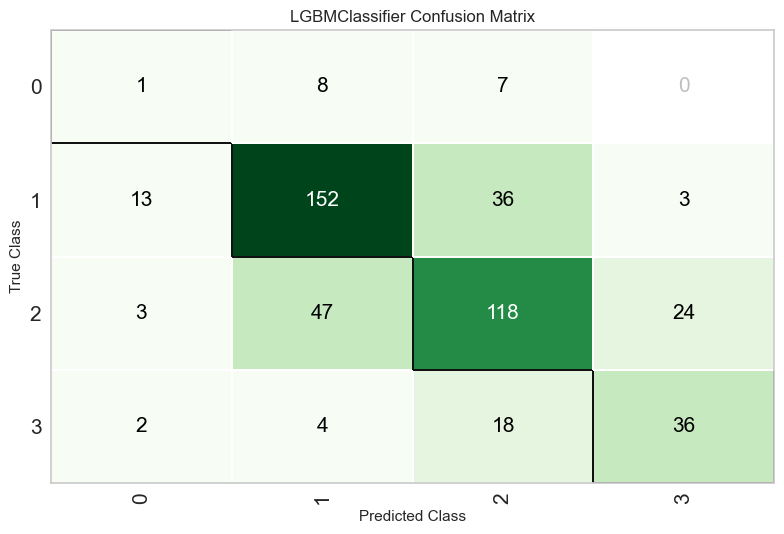

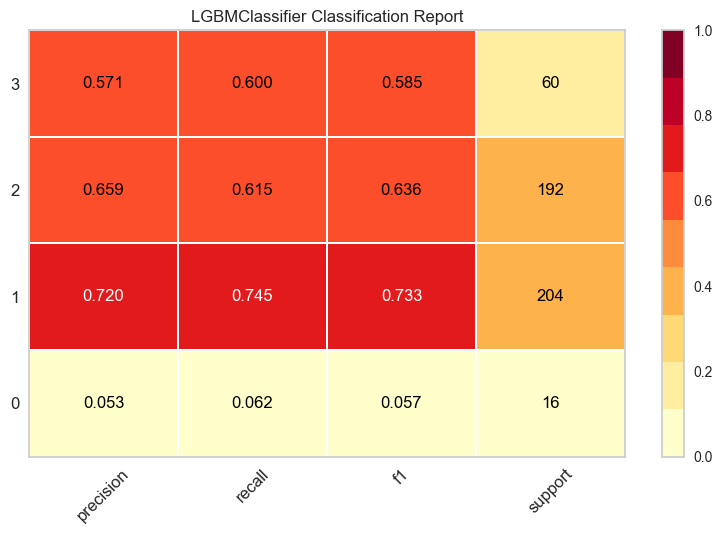

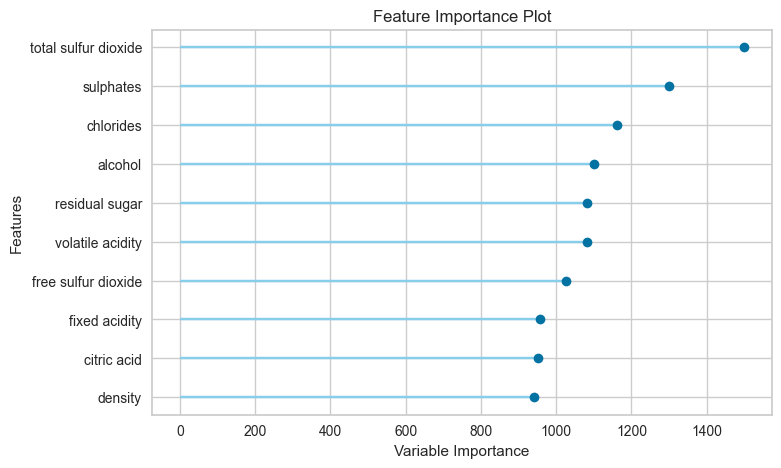

In [11]:
# Cell 6 — Evaluate the best model and visualize performance

# Interactive evaluation dashboard (confusion matrix, class reports, ROC, etc.)
evaluate_model(best_model)

# Optional static plots for quick checks
plot_model(best_model, plot='confusion_matrix')
plot_model(best_model, plot='class_report')
plot_model(best_model, plot='feature')


In [12]:
# Cell 7 — Predict on the internal hold-out (validation) set
holdout_predictions = predict_model(best_model)

holdout_predictions.head()








,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6504,0.8156,0.6504,0.6539,0.6517,0.4488,0.4492


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
758,8.1,0.87,0.00,2.2,0.084,10.0,31.0,0.99656,3.25,0.50,9.8,5,5,0.9755
1489,6.2,0.57,0.10,2.1,0.048,4.0,11.0,0.99448,3.44,0.76,10.8,6,5,0.7682
1518,7.4,0.47,0.46,2.2,0.114,7.0,20.0,0.99647,3.32,0.63,10.5,5,6,0.6221
1496,7.7,0.54,0.26,1.9,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5,5,0.9890
1141,8.2,0.38,0.32,2.5,0.080,24.0,71.0,0.99624,3.27,0.85,11.0,6,6,0.8863


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6636,0.7859,0.6636,0.6726,0.6593,0.4702,0.4748
1,0.6000,0.7969,0.6000,0.5935,0.5964,0.3637,0.3641
2,0.6545,0.8291,0.6545,0.6725,0.6505,0.4742,0.4825
3,0.5727,0.7635,0.5727,0.5788,0.5750,0.3228,0.3231
4,0.5909,0.7723,0.5909,0.5930,0.5915,0.3509,0.3512
5,0.6455,0.8277,0.6455,0.6382,0.6412,0.4402,0.4405
6,0.6182,0.8115,0.6182,0.6195,0.6169,0.3903,0.3915
7,0.6636,0.8320,0.6636,0.6996,0.6732,0.4875,0.4933
8,0.6455,0.8281,0.6455,0.6866,0.6591,0.4582,0.4624


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


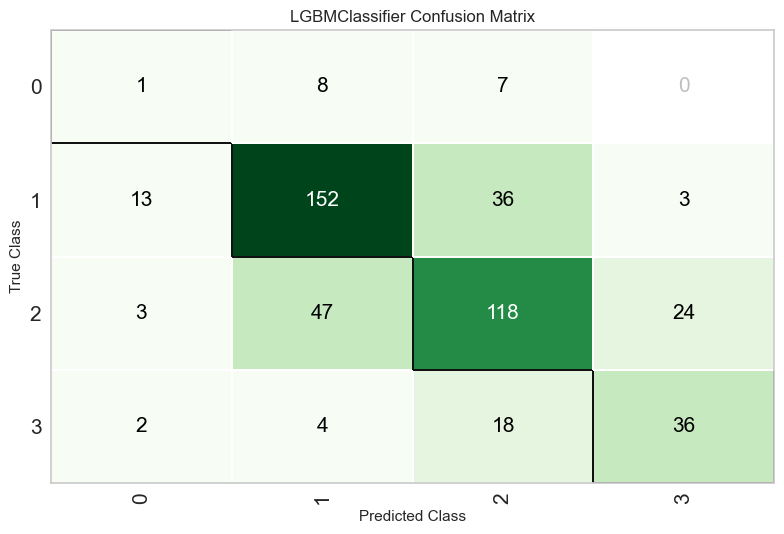

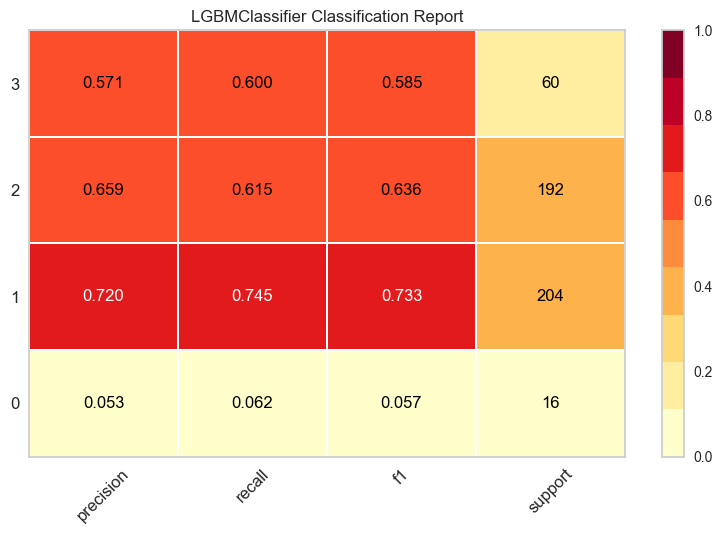

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [13]:
# Cell 8 — (Optional) Tune the best model to improve performance

# Perform hyperparameter tuning
tuned_model = tune_model(best_model, optimize='Accuracy')

# Compare tuned model vs original
plot_model(tuned_model, plot='confusion_matrix')
plot_model(tuned_model, plot='class_report')

# Display the tuned model summary
tuned_model








In [14]:
# Cell 9 — Finalize and save the model

# Retrain the tuned (or best) model on the full dataset
final_model = finalize_model(tuned_model)

# Save the finalized pipeline for reuse/deployment
save_model(final_model, 'wine_quality_model')
loaded_model = load_model('wine_quality_model')
predict_model(loaded_model, data=df.head(5))


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5,0.9777
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,5,0.9707
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,5,0.8416
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,6,0.8911
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5,0.9777
